In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd /gdrive/MyDrive/student_adaptability

/gdrive/MyDrive/student_adaptability


In [ ]:
ls

 students_adaptability_level_online_education.gsheet
'students_adaptability_level_online_education - students_adaptability_level_online_education.csv'


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [ ]:
df_train=pd.read_csv('students_adaptability_level_online_education - students_adaptability_level_online_education.csv')
df_train.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load-shedding,Financial _Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1205 non-null   object
 1   Age                   1205 non-null   object
 2   Education_Level       1205 non-null   object
 3   Institution_Type      1205 non-null   object
 4   IT_Student            1205 non-null   object
 5   Location              1205 non-null   object
 6   Load-shedding         1205 non-null   object
 7   Financial _Condition  1205 non-null   object
 8   Internet_Type         1205 non-null   object
 9   Network_Type          1205 non-null   object
 10  Class_Duration        1205 non-null   object
 11  Self_Lms              1205 non-null   object
 12  Device                1205 non-null   object
 13  Adaptivity_Level      1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load-shedding,Financial _Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


# EDA

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_train.columns

Index(['Gender', 'Age', 'Education_Level', 'Institution_Type', 'IT_Student',
       'Location', 'Load-shedding', 'Financial _Condition', 'Internet_Type',
       'Network_Type', 'Class_Duration', 'Self_Lms', 'Device',
       'Adaptivity_Level'],
      dtype='object')

In [ ]:
df_train.Adaptivity_Level.value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity_Level, dtype: int64

In [ ]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [ ]:
binary_cols

['Gender',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load-shedding',
 'Internet_Type',
 'Self_Lms']

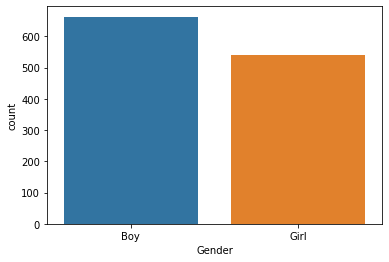

In [ ]:
sns.countplot("Gender", data=df_train)

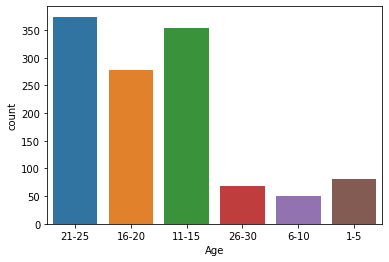

In [ ]:
sns.countplot("Age", data=df_train)

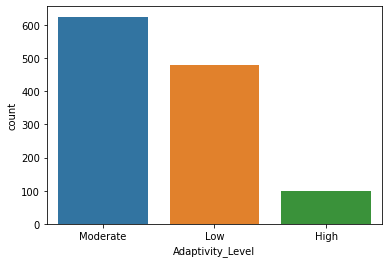

In [ ]:
sns.countplot("Adaptivity_Level", data=df_train)

In [ ]:
Adaptivity_Level_numeric = {'Moderate':2,'Low':1,'High':0}
df_train.Adaptivity_Level.replace(Adaptivity_Level_numeric, inplace=True)

In [ ]:
Device_numeric = {'Tab':2,'Mobile':1,'Computer':0}
df_train.Device.replace(Device_numeric, inplace=True)

In [ ]:
Self_Lms_numeric = {'No':1,'Yes':0}
df_train.Self_Lms.replace(Self_Lms_numeric, inplace=True)

In [ ]:
Class_Duration_numeric = {'3-6':2,'1-3':1,'0':0}
df_train.Class_Duration.replace(Class_Duration_numeric, inplace=True)

In [ ]:
Network_Type_numeric = {'4G':2,'3G':1,'2G':0}
df_train.Network_Type.replace(Network_Type_numeric, inplace=True)

In [ ]:
Internet_Type_numeric = {'Wifi':1,'Mobile Data':0}
df_train.Internet_Type.replace(Internet_Type_numeric, inplace=True)

In [ ]:
Gender_numeric = {'Boy':1,'Girl':0}
df_train.Gender.replace(Gender_numeric, inplace=True)

In [ ]:
Age_numeric = {'26-30':5,'21-25':4,'16-20':3,'11-15':2,'6-10':1,'1-5':0}
df_train.Age.replace(Age_numeric, inplace=True)

In [ ]:
Education_Level_numeric = {'University':2,'College':1,'School':0}
df_train.Education_Level.replace(Education_Level_numeric, inplace=True)

In [ ]:
Institution_Type_numeric = {'Non Goverment':1,'Goverment':0}
df_train.Institution_Type.replace(Institution_Type_numeric, inplace=True)

In [ ]:
IT_Student_numeric = {'No':1,'Yes':0}
df_train.IT_Student.replace(IT_Student_numeric, inplace=True)

In [ ]:
Location_numeric = {'No':1,'Yes':0}
df_train.Location.replace(Location_numeric, inplace=True)

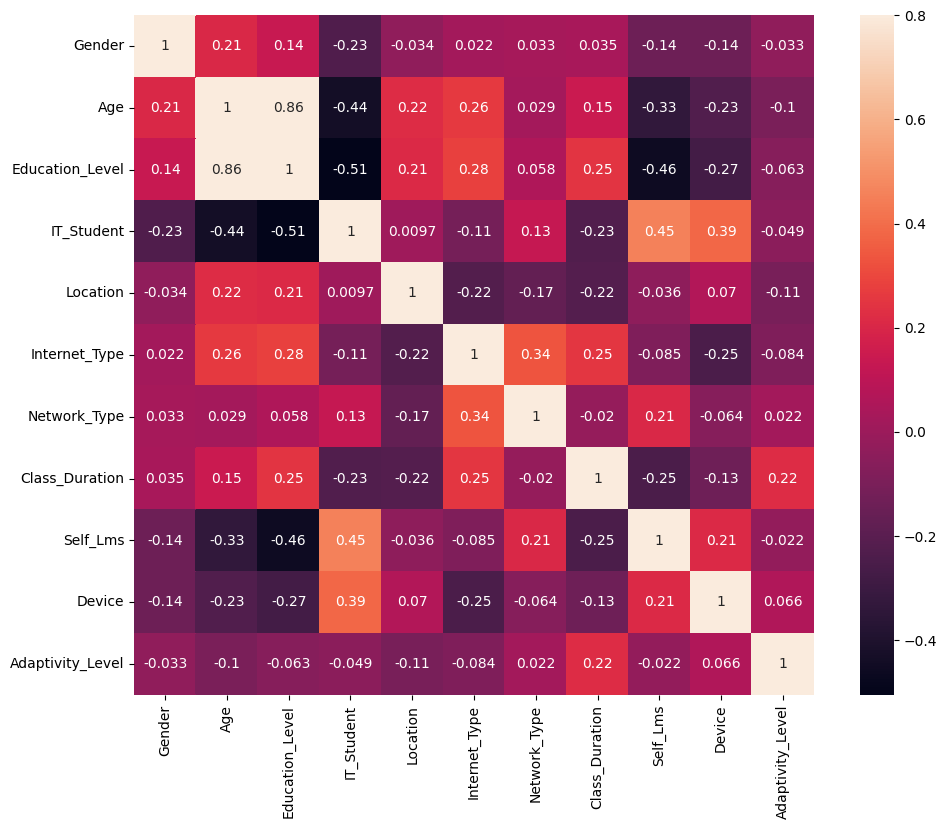

In [ ]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

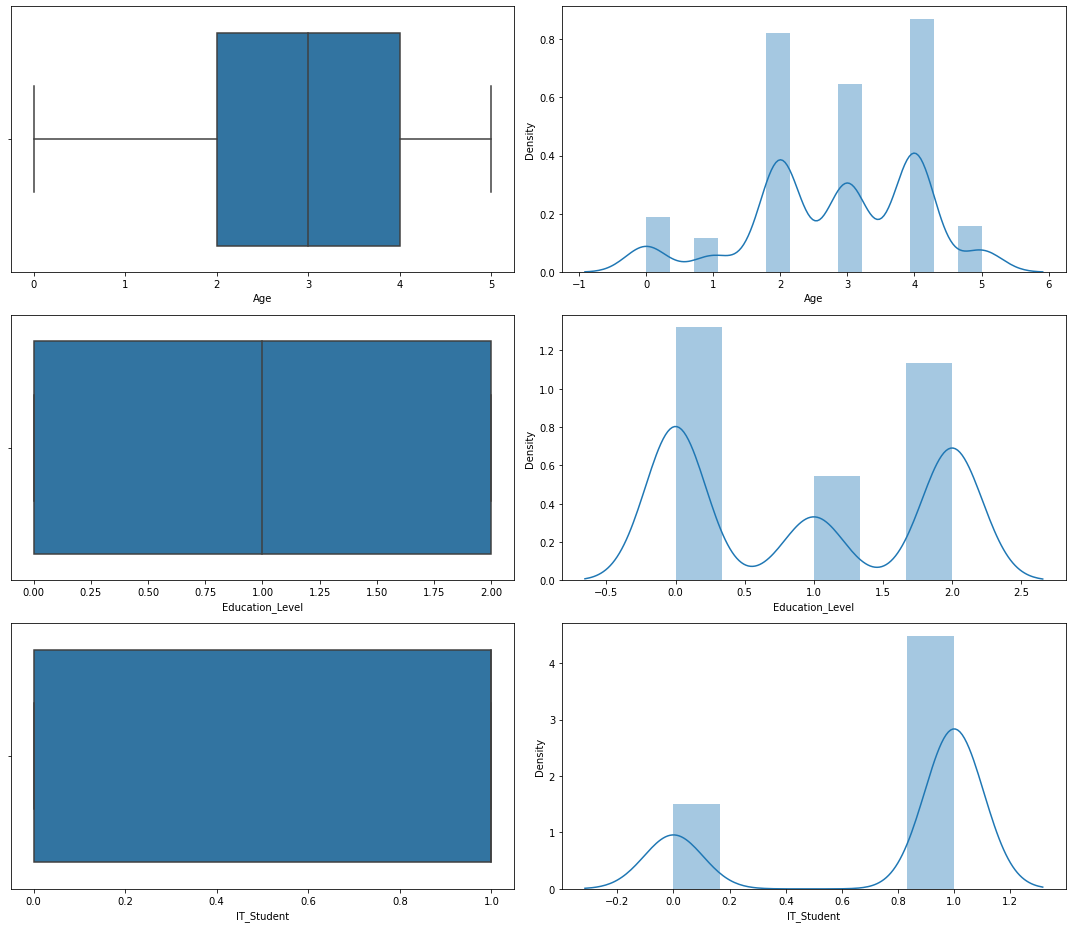

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (15, 13))
sns.boxplot(x= df_train["Age"], ax = ax[0,0])
sns.distplot(df_train['Age'], ax = ax[0,1])
sns.boxplot(x= df_train["Education_Level"], ax = ax[1,0])
sns.distplot(df_train['Education_Level'], ax = ax[1,1])
sns.boxplot(x= df_train["IT_Student"], ax = ax[2,0])
sns.distplot(df_train['IT_Student'], ax = ax[2,1])
plt.tight_layout()

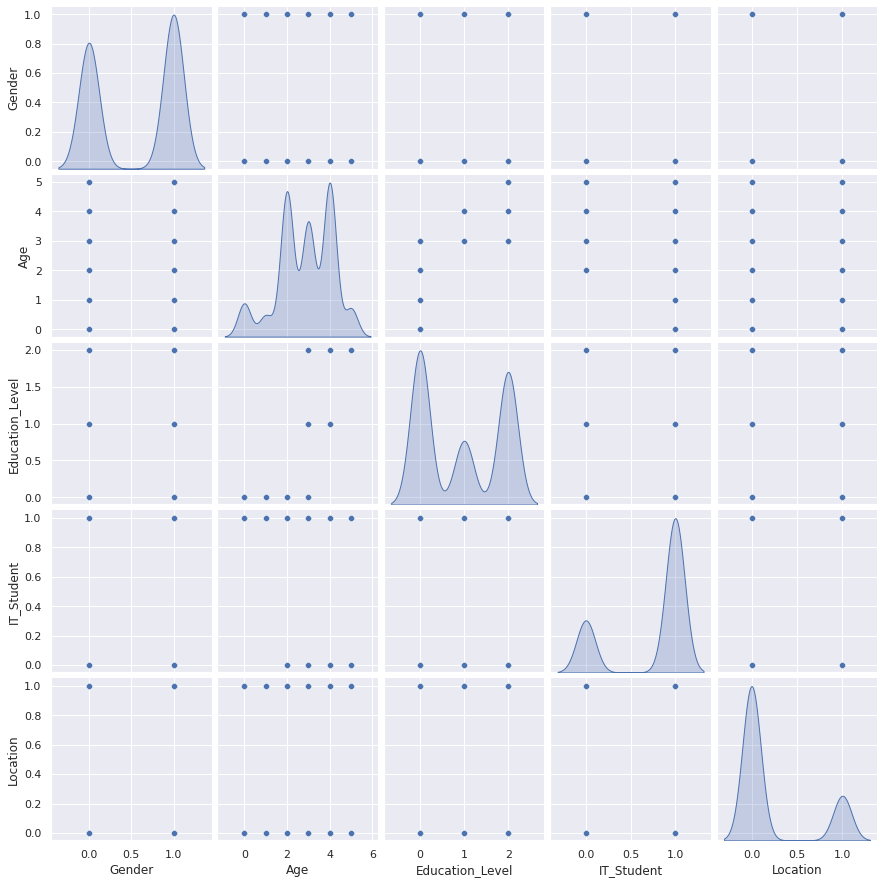

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [ ]:

X = df_train.drop(['Load-shedding', 'Financial _Condition','Institution_Type','Adaptivity_Level'], axis = 1)
Y = df_train["Adaptivity_Level"]
x_Data = X.values
y_Data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

0.6887966804979253

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.70466321 0.60103627 0.62176166 0.62176166 0.640625  ]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.6473029045643154

In [ ]:
confusion_matrix(y_train, pred)

array([[ 16,  12,  49],
       [  3, 255, 119],
       [ 33, 124, 353]])

In [ ]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        23
           1       0.76      0.69      0.72       103
           2       0.66      0.76      0.70       115

    accuracy                           0.69       241
   macro avg       0.64      0.60      0.61       241
weighted avg       0.69      0.69      0.68       241



In [ ]:
cma = confusion_matrix(y_test, predicted_test)

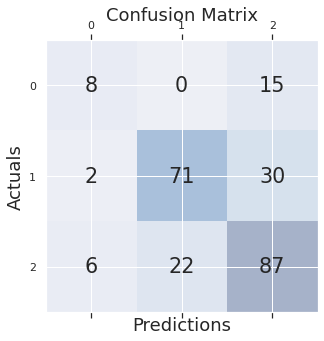

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rf

In [ ]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8454356846473029

In [ ]:
confusion_matrix(y_train, pred)

array([[ 41,   0,  36],
       [  3, 298,  76],
       [  4,  30, 476]])

In [ ]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70        23
           1       0.89      0.74      0.81       103
           2       0.76      0.91      0.83       115

    accuracy                           0.81       241
   macro avg       0.82      0.75      0.78       241
weighted avg       0.82      0.81      0.81       241



In [ ]:
cma = confusion_matrix(y_test, pred_test)

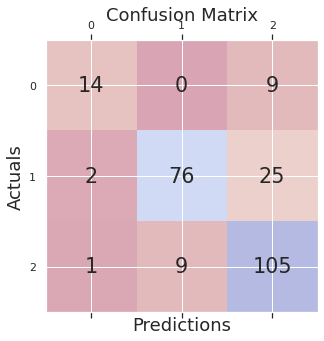

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [ ]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.8464730290456431

In [ ]:
confusion_matrix(y_train, pred1)

array([[ 44,   0,  33],
       [  3, 305,  69],
       [  7,  36, 467]])

In [ ]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [ ]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        23
           1       0.88      0.76      0.81       103
           2       0.78      0.90      0.84       115

    accuracy                           0.81       241
   macro avg       0.80      0.76      0.77       241
weighted avg       0.82      0.81      0.81       241



In [ ]:
cma = confusion_matrix(y_test, pred1_test)

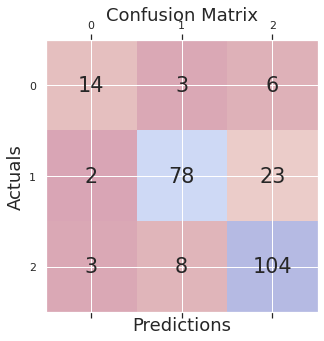

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.6877593360995851

In [ ]:
confusion_matrix(y_train, pred_LR)

array([[  0,  10,  67],
       [  0, 224, 153],
       [  0,  71, 439]])

In [ ]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [ ]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.76      0.57      0.65       103
           2       0.61      0.87      0.72       115

    accuracy                           0.66       241
   macro avg       0.46      0.48      0.46       241
weighted avg       0.62      0.66      0.62       241



In [ ]:
cma = confusion_matrix(y_test, pred_LR_test)

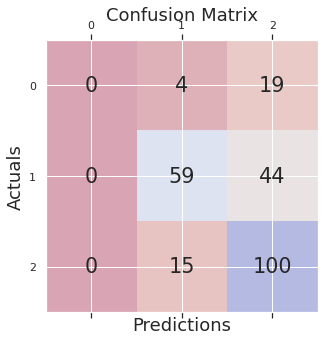

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.720954356846473

In [ ]:
confusion_matrix(y_train, pred_NN)

array([[  0,   0,  77],
       [  0, 235, 142],
       [  0,  50, 460]])

In [ ]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [ ]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.80      0.57      0.67       103
           2       0.62      0.90      0.73       115

    accuracy                           0.67       241
   macro avg       0.47      0.49      0.47       241
weighted avg       0.64      0.67      0.63       241



In [ ]:
cma = confusion_matrix(y_test, pred_NN_test)

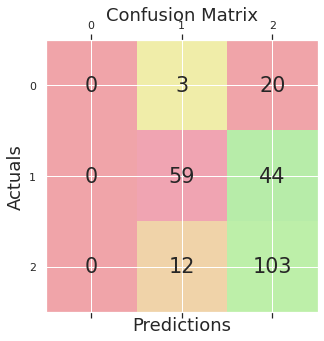

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.7614107883817427

In [ ]:
confusion_matrix(y_train, pred_XGB)

array([[ 11,   8,  58],
       [  0, 263, 114],
       [  1,  49, 460]])

In [ ]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [ ]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.86      0.26      0.40        23
           1       0.82      0.66      0.73       103
           2       0.66      0.87      0.75       115

    accuracy                           0.72       241
   macro avg       0.78      0.60      0.63       241
weighted avg       0.75      0.72      0.71       241



In [ ]:
cma = confusion_matrix(y_test, pred_XGB_test)

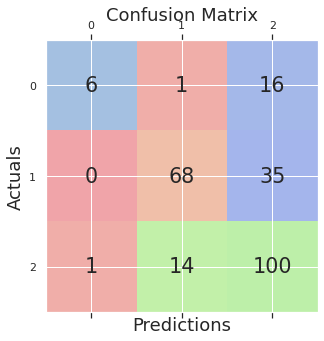

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

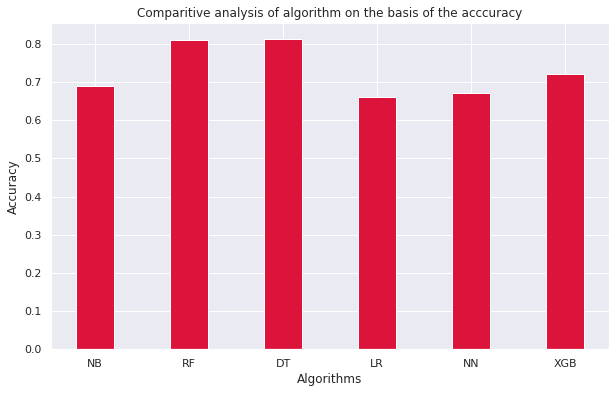

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


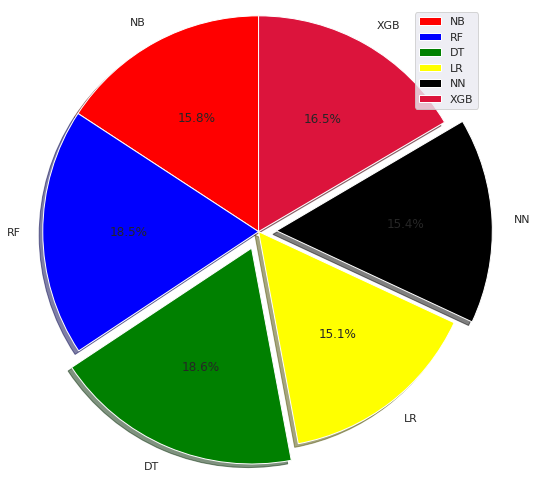

In [ ]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [ ]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']